In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df = pd.read_excel("../Data/gerald_data_processed.xlsx")

In [59]:
columns_to_keep = ['job_id', 'required_experience', 'required_education', 'fraudulent']

processed_df = df.copy()

# Drop columns that are not in the list
processed_df = processed_df[columns_to_keep]

In [60]:
processed_df.head()

,job_id,required_experience,required_education,fraudulent
0,1,Internship,NaN,0
1,2,Not Applicable,NaN,0
2,3,NaN,NaN,0
3,4,Mid-Senior level,Bachelor's Degree,0
4,5,Mid-Senior level,Bachelor's Degree,0


In [61]:
processed_df[['required_experience', 'required_education']] = processed_df[['required_experience', 'required_education']].astype(str)
processed_df[['required_experience', 'required_education']] = processed_df[['required_experience', 'required_education']].astype(str)

In [62]:
fraud_df = processed_df[processed_df["fraudulent"] == 1]
non_fraud_df = processed_df[processed_df["fraudulent"] == 0]

## Required Experience

In [63]:
processed_df["required_experience"].unique()

array(['Internship', 'Not Applicable', 'nan', 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

In [64]:
# Define a dictionary to map labels to colors
color_dict = {
    'Internship': 'skyblue',
    'Not Applicable': 'lightcoral',
    'nan': 'lightgray',  # Handle NaN values as strings
    'Mid-Senior level': 'limegreen',
    'Associate': 'gold',
    'Entry level': 'mediumorchid',
    'Executive': 'deepskyblue',
    'Director': 'lightpink'
}

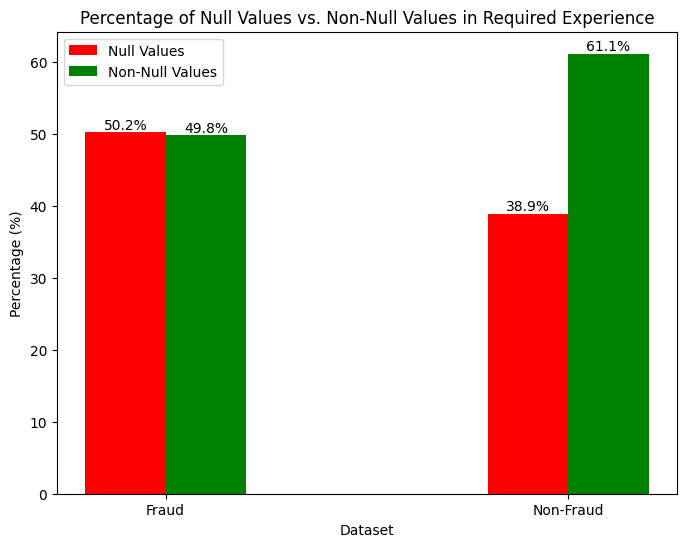

In [76]:
nan_count_fraud = (fraud_df['required_experience'] == "nan").sum()
non_nan_count_fraud = (fraud_df['required_experience'] != "nan").sum()

nan_count_non_fraud = (non_fraud_df['required_experience'] == "nan").sum()
non_nan_count_non_fraud = (non_fraud_df['required_experience'] != "nan").sum()

# Calculate percentages
total_count_fraud = len(fraud_df)
nan_percentage_fraud = (nan_count_fraud / total_count_fraud) * 100
non_nan_percentage_fraud = (non_nan_count_fraud / total_count_fraud) * 100

total_count_non_fraud = len(non_fraud_df)
nan_percentage_non_fraud = (nan_count_non_fraud / total_count_non_fraud) * 100
non_nan_percentage_non_fraud = (non_nan_count_non_fraud / total_count_non_fraud) * 100

plt.figure(figsize=(8, 6))
bar_width = 0.2
index = range(2)

bars1 = plt.bar(index, [nan_percentage_fraud, nan_percentage_non_fraud], bar_width, color='red', label='Null Values')
bars2 = plt.bar([i + bar_width for i in index], [non_nan_percentage_fraud, non_nan_percentage_non_fraud], bar_width, color='green', label='Non-Null Values')

plt.xlabel('Dataset')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Null Values vs. Non-Null Values in Required Experience')
plt.xticks([i + bar_width / 2 for i in index], ['Fraud', 'Non-Fraud'])
plt.legend()

# Add percentages on top of the bars
for bar, percentage in zip(bars1 + bars2, [nan_percentage_fraud, nan_percentage_non_fraud, non_nan_percentage_fraud, non_nan_percentage_non_fraud]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

### Fraud

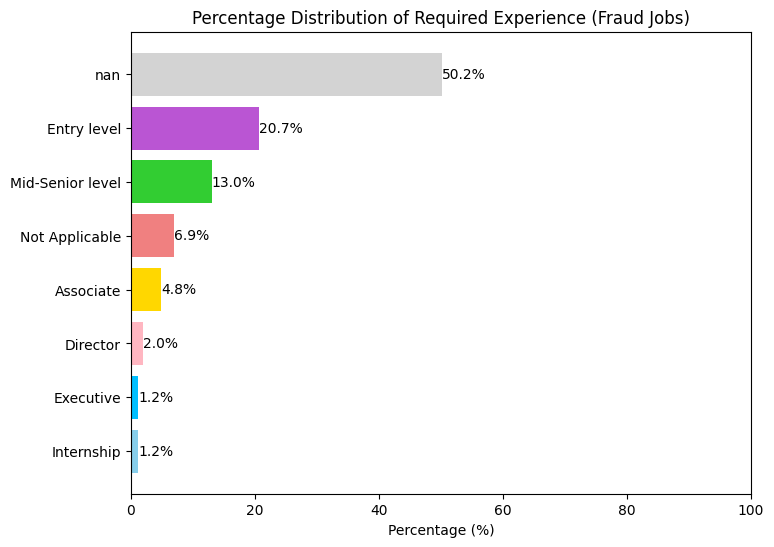

In [66]:
# Count the unique values in the 'required_experience' column, including NaN
experience_counts = fraud_df['required_experience'].value_counts(normalize=True, dropna=False) * 100

# Sort the values in descending order
experience_counts = experience_counts.sort_values(ascending=False)

colors = [color_dict[label] for label in experience_counts.index]

plt.figure(figsize=(8, 6))
plt.barh(experience_counts.index, experience_counts.values, color=colors)
plt.xlabel('Percentage (%)')
plt.title('Percentage Distribution of Required Experience (Fraud Jobs)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest percentage at the top

plt.xlim(0, 100)

# Display percentage values on the bars
for i, v in enumerate(experience_counts.values):
    plt.text(v, i, f'{v:.1f}%', color='black', va='center')

plt.show()

### Non-fraud

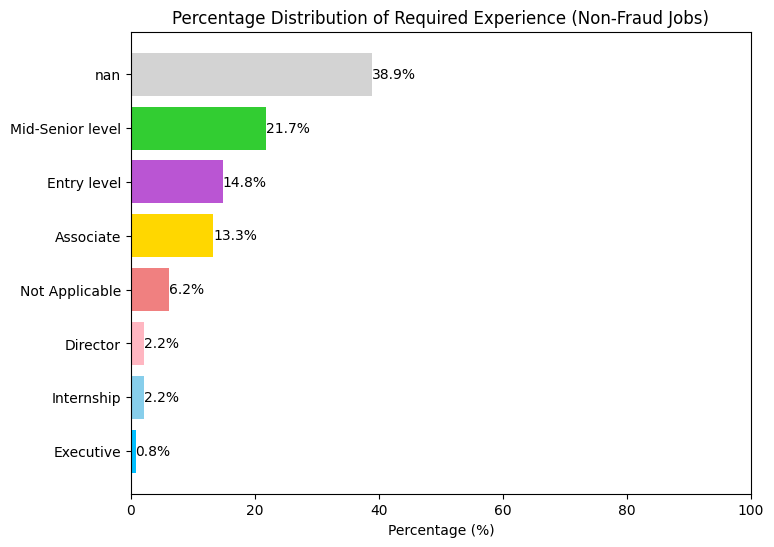

In [67]:
# Count the unique values in the 'required_experience' column, including NaN
experience_counts = non_fraud_df['required_experience'].value_counts(normalize=True, dropna=False) * 100

# Sort the values in descending order
experience_counts = experience_counts.sort_values(ascending=False)

colors = [color_dict[label] for label in experience_counts.index]

plt.figure(figsize=(8, 6))
plt.barh(experience_counts.index, experience_counts.values, color=colors)
plt.xlabel('Percentage (%)')
plt.title('Percentage Distribution of Required Experience (Non-Fraud Jobs)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest percentage at the top

# Display percentage values on the bars
for i, v in enumerate(experience_counts.values):
    plt.text(v, i, f'{v:.1f}%', color='black', va='center')
    
plt.xlim(0, 100)

plt.show()

## Required Education

In [68]:
processed_df["required_education"].unique()

array(['nan', "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [69]:
color_palette = {
    'nan': 'lightgray',
    "Bachelor's Degree": 'skyblue',
    "Master's Degree": 'lightcoral',
    'High School or equivalent': 'gold',
    'Unspecified': 'lightseagreen',
    'Some College Coursework Completed': 'mediumorchid',
    'Vocational': 'lightsalmon',
    'Certification': 'limegreen',
    'Associate Degree': 'lightsteelblue',
    'Professional': 'plum',
    'Doctorate': 'lightpink',
    'Some High School Coursework': 'lightcyan',
    'Vocational - Degree': 'khaki',
    'Vocational - HS Diploma': 'lightgreen'
}

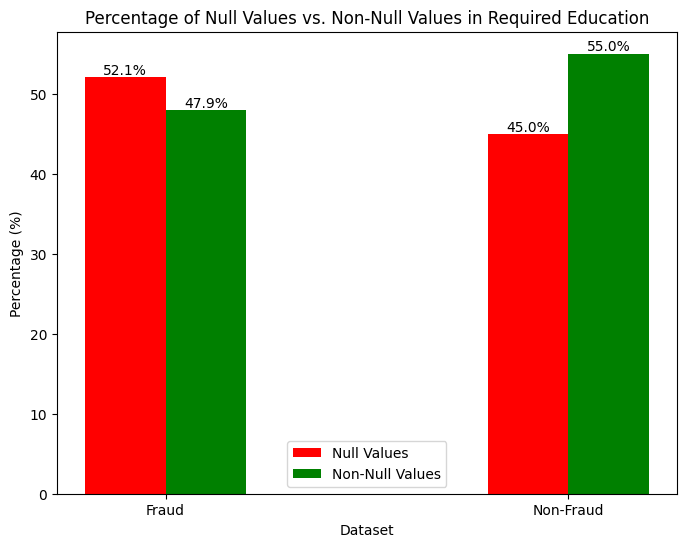

In [77]:
nan_count_fraud = (fraud_df['required_education'] == "nan").sum()
non_nan_count_fraud = (fraud_df['required_education'] != "nan").sum()

nan_count_non_fraud = (non_fraud_df['required_education'] == "nan").sum()
non_nan_count_non_fraud = (non_fraud_df['required_education'] != "nan").sum()

# Calculate percentages
total_count_fraud = len(fraud_df)
nan_percentage_fraud = (nan_count_fraud / total_count_fraud) * 100
non_nan_percentage_fraud = (non_nan_count_fraud / total_count_fraud) * 100

total_count_non_fraud = len(non_fraud_df)
nan_percentage_non_fraud = (nan_count_non_fraud / total_count_non_fraud) * 100
non_nan_percentage_non_fraud = (non_nan_count_non_fraud / total_count_non_fraud) * 100

plt.figure(figsize=(8, 6))
bar_width = 0.2
index = range(2)

bars1 = plt.bar(index, [nan_percentage_fraud, nan_percentage_non_fraud], bar_width, color='red', label='Null Values')
bars2 = plt.bar([i + bar_width for i in index], [non_nan_percentage_fraud, non_nan_percentage_non_fraud], bar_width, color='green', label='Non-Null Values')

plt.xlabel('Dataset')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Null Values vs. Non-Null Values in Required Education')
plt.xticks([i + bar_width / 2 for i in index], ['Fraud', 'Non-Fraud'])
plt.legend()

# Add percentages on top of the bars
for bar, percentage in zip(bars1 + bars2, [nan_percentage_fraud, nan_percentage_non_fraud, non_nan_percentage_fraud, non_nan_percentage_non_fraud]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

### Fraud

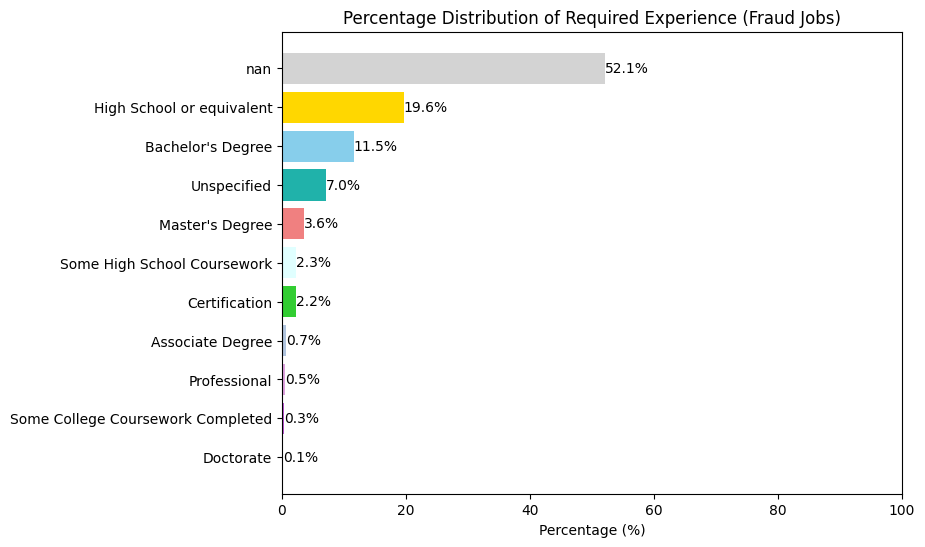

In [70]:
# Count the unique values in the 'required_experience' column, including NaN
experience_counts = fraud_df['required_education'].value_counts(normalize=True, dropna=False) * 100

# Sort the values in descending order
experience_counts = experience_counts.sort_values(ascending=False)

colors = [color_palette[label] for label in experience_counts.index]

plt.figure(figsize=(8, 6))
plt.barh(experience_counts.index, experience_counts.values, color=colors)
plt.xlabel('Percentage (%)')
plt.title('Percentage Distribution of Required Experience (Fraud Jobs)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest percentage at the top

plt.xlim(0, 100)

# Display percentage values on the bars
for i, v in enumerate(experience_counts.values):
    plt.text(v, i, f'{v:.1f}%', color='black', va='center')

plt.show()

### Non-fraud

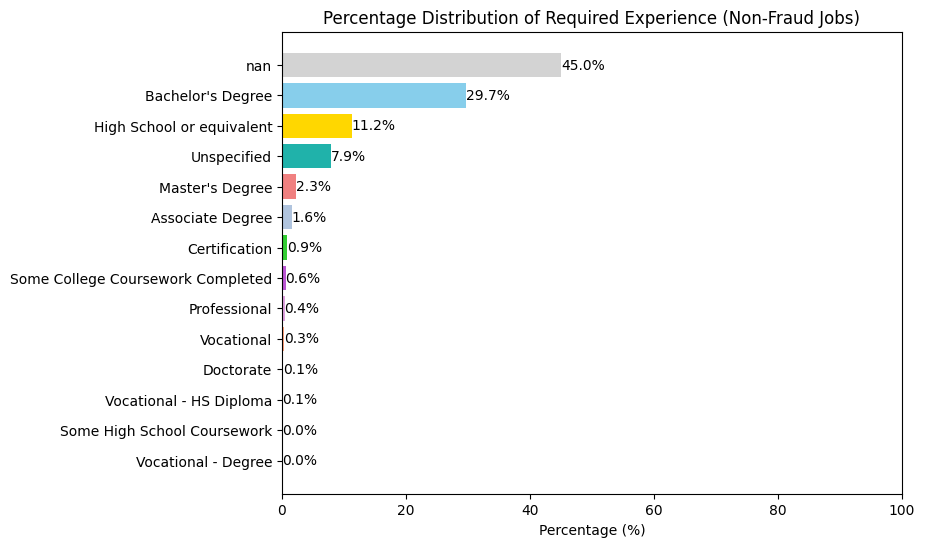

In [71]:
# Count the unique values in the 'required_experience' column, including NaN
experience_counts = non_fraud_df['required_education'].value_counts(normalize=True, dropna=False) * 100

# Sort the values in descending order
experience_counts = experience_counts.sort_values(ascending=False)

colors = [color_palette[label] for label in experience_counts.index]

plt.figure(figsize=(8, 6))
plt.barh(experience_counts.index, experience_counts.values, color=colors)
plt.xlabel('Percentage (%)')
plt.title('Percentage Distribution of Required Experience (Non-Fraud Jobs)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest percentage at the top

# Display percentage values on the bars
for i, v in enumerate(experience_counts.values):
    plt.text(v, i, f'{v:.1f}%', color='black', va='center')
    
plt.xlim(0, 100)

plt.show()